In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

### Loop through dataset

In [34]:
MODELS = ['llama3:8b','llama3.2:1b','qwen3:0.6b','gpt-oss:20b','gpt-4.1-mini']
DATASETS = ['truthful_qa','med_qa','fin_qa']

In [35]:
COLOR_MAP = {
    'llama3:8b': '#1f77b4',      # Muted Blue
    'llama3.2:1b': '#ff7f0e',    # Safety Orange
    'qwen3:0.6b': '#2ca02c',     # Cooked Asparagus Green
    'gpt-oss:20b': '#d62728',     # Brick Red
    'gpt-4.1-mini': '#9467bd'    # Muted Purple
}

# Define a marker map to give each dataset a consistent shape
MARKER_MAP = {
    'truthful_qa': 'o',  # Circle
    'med_qa': 's',       # Square
    'fin_qa': 'X'        # Filled-in X
}


In [36]:
model =MODELS[0]
dataset = DATASETS[0]

In [37]:
data = pd.read_json(f"./results/{model}-{dataset}/model_evaluations.jsonl",lines=True)

In [38]:
data['score'].values

array([4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 5, 4, 4, 2, 4, 4, 4, 3, 4, 4, 4, 5, 5, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 4, 5,
       2, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 5, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 5, 4, 2, 4, 2,
       4, 2, 2, 4, 4, 5, 4, 4, 5, 4, 4, 5, 4, 3, 4, 4, 4, 4])

In [39]:
data['truthfulness_score'].values

array([0.8, 0.5, 0.7, 1. , 0.8, 0.8, 1. , 0.9, 0.5, 1. , 1. , 1. , 0.7,
       0.8, 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 1. , 0.5, 0.8, 0.9, 1. ,
       0.5, 1. , 1. , 0.5, 0. , 1. , 1. , 0.8, 0.8, 1. , 1. , 1. , 1. ,
       1. , 0.9, 0.7, 0.8, 1. , 0.5, 1. , 1. , 0.8, 1. , 1. , 1. , 1. ,
       0.8, 1. , 0.8, 0.8, 1. , 0.8, 1. , 1. , 0.8, 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 0.9, 1. , 1. , 1. , 1. , 1. , 1. , 0.8, 1. , 1. ,
       1. , 0.9, 1. , 1. , 0.8, 1. , 1. , 1. , 0.8, 1. , 1. , 1. , 1. ,
       0.5, 1. , 1. , 1. , 0.5, 1. , 0.5, 1. , 1. , 0.8, 1. , 1. , 1. ,
       1. , 1. , 0.5, 0.5, 0.8, 1. , 1. , 1. , 1. , 1. , 0.9, 1. , 1. ,
       1. , 1. , 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. ,
       1. , 1. , 0.8, 1. , 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 0.8, 1. ,
       1. , 1. , 1. , 0.9, 0.9, 1. , 0.8])

In [40]:
grouped_vals = data.groupby('score')['truthfulness_score'].mean()

In [50]:
from matplotlib.lines import Line2D # Import Line2D for custom legends

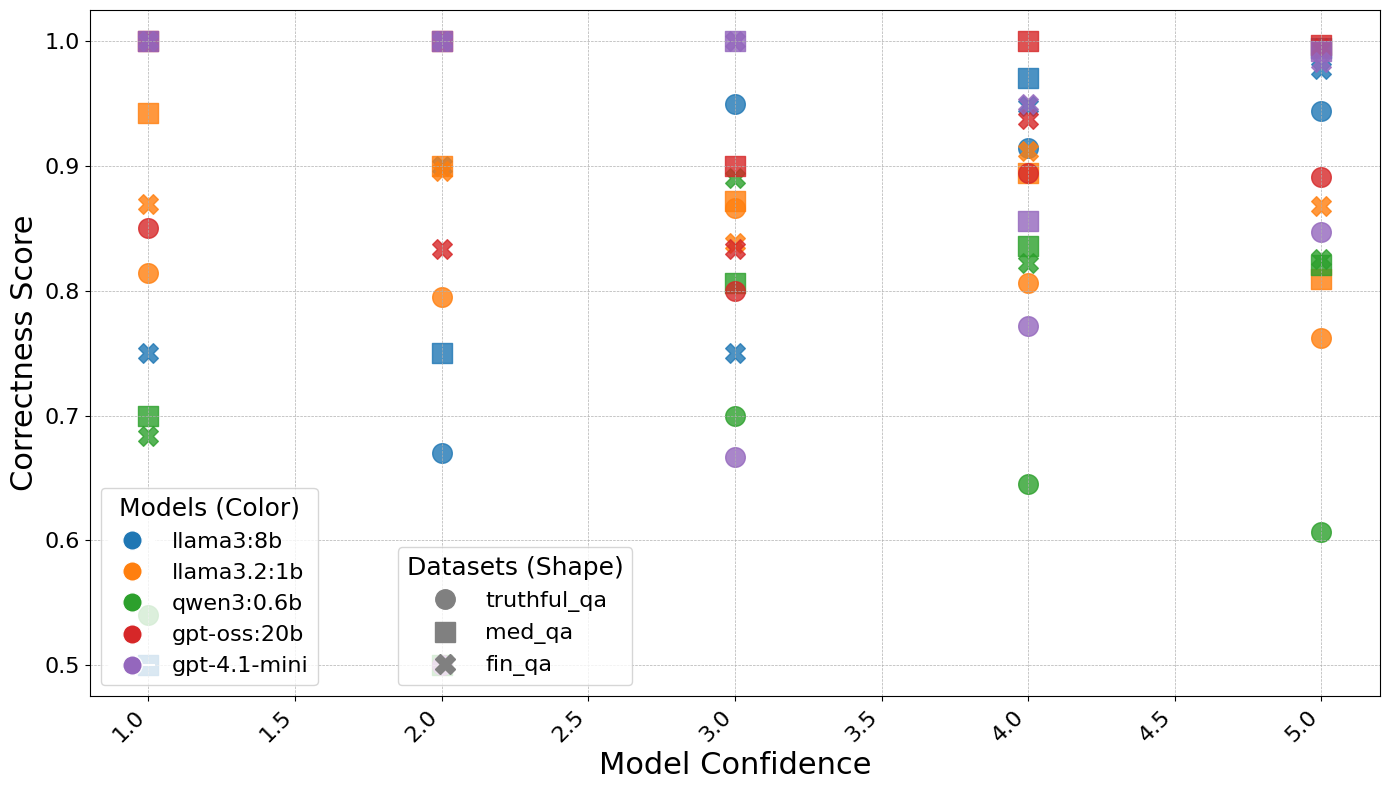

In [78]:
fig, ax = plt.subplots(figsize=(14, 8))
for model in MODELS:
    for dataset in DATASETS:
        # Construct the file path using the pattern you provided
        file_path = f"./results/{model}-{dataset}/model_evaluations.jsonl"

        # Check if the file actually exists before trying to open it
        if not os.path.exists(file_path):
            print(f"--> WARNING: File not found, skipping: {file_path}")
            continue

        try:
            # Read the JSON Lines file into a pandas DataFrame
            df = pd.read_json(file_path, lines=True)

            # --- IMPORTANT: ADJUST THESE COLUMN NAMES FOR YOUR DATA ---
            # This is where you perform the groupby and mean calculation.
            # Change 'Category' and 'Value' to match the columns in your .jsonl files.
            grouped_means = df.groupby('score')['truthfulness_score'].mean()
            # ---------------------------------------------------------

            # Plot the aggregated data on our main axes (ax)
            ax.scatter(
                x=grouped_means.index,
                y=grouped_means.values,
                s=200,  # Increased size to make shapes clearer
                alpha=0.8, # Use transparency to see overlapping points
                color=COLOR_MAP.get(model, '#808080'), # Color by model
                marker=MARKER_MAP.get(dataset, 'p'), # Shape by dataset
            )
            # print(f"  + Plotted data from: {file_path}")

        except KeyError as e:
            print(f"--> ERROR: A required column was not found in {file_path}. Details: {e}")
        except Exception as e:
            print(f"--> ERROR: Could not process file {file_path}. Details: {e}")

# --- 4. Final Touches to Make the Plot Readable ---
# Add a title and labels
ax.set_xlabel('Model Confidence', fontsize=22)
ax.set_ylabel('Correctness Score', fontsize=22)

# Improve layout and add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they are long

# --- Custom Legend ---
# Create proxy artists for the legend to explain colors and shapes separately.

# Legend for Models (Colors) - Placed in the bottom-left corner
color_legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=model,
           markerfacecolor=color, markersize=14)
    for model, color in COLOR_MAP.items() if model in MODELS
]
legend1 = ax.legend(handles=color_legend_elements, title="Models (Color)",
                    loc="lower left", title_fontsize=18, fontsize=16)

# Add the first legend manually to the axes
ax.add_artist(legend1)
ax.tick_params(axis='both', which='major', labelsize=16)

# Legend for Datasets (Shapes) - Placed next to the first one
shape_legend_elements = [
    Line2D([0], [0], marker=marker, color='grey', label=dataset,
           markersize=14, linestyle='None')
    for dataset, marker in MARKER_MAP.items() if dataset in DATASETS
]
# By using bbox_to_anchor, we can precisely place this legend next to the first one.
ax.legend(handles=shape_legend_elements, title="Datasets (Shape)",
          loc="lower left", bbox_to_anchor=(0.23, 0),
          title_fontsize=18, fontsize=16)


# Adjust the plot layout to make sure everything fits
plt.tight_layout()
# Improve layout and add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, ha='right') #
plt.savefig("./plots/confidence_vs_truthful.pdf")
plt.show()

---
## Mean Plots

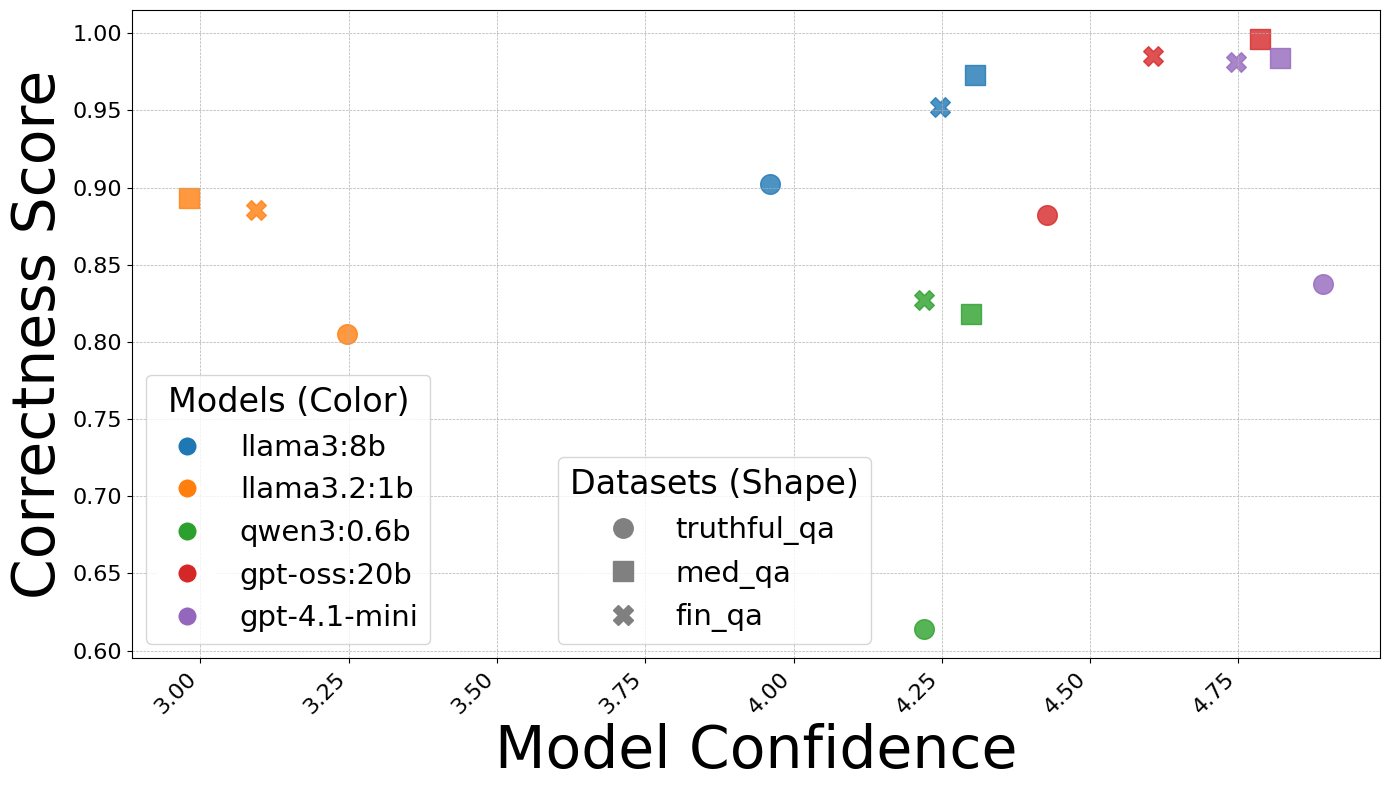

In [83]:
fig, ax = plt.subplots(figsize=(14, 8))
for model in MODELS:
    for dataset in DATASETS:
        # Construct the file path using the pattern you provided
        file_path = f"./results/{model}-{dataset}/model_evaluations.jsonl"

        # Check if the file actually exists before trying to open it
        if not os.path.exists(file_path):
            print(f"--> WARNING: File not found, skipping: {file_path}")
            continue

        try:
            # Read the JSON Lines file into a pandas DataFrame
            df = pd.read_json(file_path, lines=True)

            # --- IMPORTANT: ADJUST THESE COLUMN NAMES FOR YOUR DATA ---
            # This is where you perform the groupby and mean calculation.
            # Change 'Category' and 'Value' to match the columns in your .jsonl files.
            mean_score = np.mean(df['score'].values)
            mean_trust = np.mean(df['truthfulness_score'].values)
            # ---------------------------------------------------------

            # Plot the aggregated data on our main axes (ax)
            ax.scatter(
                x=mean_score,
                y=mean_trust,
                s=200,  # Increased size to make shapes clearer
                alpha=0.8, # Use transparency to see overlapping points
                color=COLOR_MAP.get(model, '#808080'), # Color by model
                marker=MARKER_MAP.get(dataset, 'p'), # Shape by dataset
            )
            # print(f"  + Plotted data from: {file_path}")

        except KeyError as e:
            print(f"--> ERROR: A required column was not found in {file_path}. Details: {e}")
        except Exception as e:
            print(f"--> ERROR: Could not process file {file_path}. Details: {e}")

# --- 4. Final Touches to Make the Plot Readable ---
# Add a title and labels
ax.set_xlabel('Model Confidence', fontsize=42)
ax.set_ylabel('Correctness Score', fontsize=42)

# Improve layout and add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they are long

# --- Custom Legend ---
# Create proxy artists for the legend to explain colors and shapes separately.

# Legend for Models (Colors) - Placed in the bottom-left corner
color_legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=model,
           markerfacecolor=color, markersize=14)
    for model, color in COLOR_MAP.items() if model in MODELS
]
legend1 = ax.legend(handles=color_legend_elements, title="Models (Color)",
                    loc="lower left", title_fontsize=24, fontsize=21)

# Add the first legend manually to the axes
ax.add_artist(legend1)
ax.tick_params(axis='both', which='major', labelsize=16)

# Legend for Datasets (Shapes) - Placed next to the first one
shape_legend_elements = [
    Line2D([0], [0], marker=marker, color='grey', label=dataset,
           markersize=14, linestyle='None')
    for dataset, marker in MARKER_MAP.items() if dataset in DATASETS
]
# By using bbox_to_anchor, we can precisely place this legend next to the first one.
ax.legend(handles=shape_legend_elements, title="Datasets (Shape)",
          loc="lower left", bbox_to_anchor=(0.33, 0),
          title_fontsize=24, fontsize=21)


# Adjust the plot layout to make sure everything fits
plt.tight_layout()
# Improve layout and add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, ha='right') #
plt.savefig("./plots/mean_confidence_vs_truthful.pdf")
plt.show()